<a href="https://colab.research.google.com/github/matyi101/stats/blob/main/Forecasting_on_Credit_Card_Loan_Application_At_Islamic_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting on Credit Card Loan Application At Islamic Banking

In [ ]:
#!pip install pystan
#!pip install fbprophet

In [ ]:
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from fbprophet import Prophet
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.colors as mcolors
import scipy.stats as stats
sns.set()

plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/matyi101/stats/main/islamic_loan.csv'
df = pd.read_csv(url)
df

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01,2706.397,2147.472,1574.988,238.925,0.116
1,2011-02-01,1992.288,1955.299,1455.753,166.503,0.034
2,2011-03-01,2313.784,3072.997,2180.135,277.362,0.040
3,2011-04-01,1883.896,3635.457,1716.299,255.266,0.237
4,2011-05-01,2232.802,4138.049,1843.763,209.453,0.232
...,...,...,...,...,...,...
115,2020-08-01,4776.557,11844.264,2554.465,564.418,0.000
116,2020-09-01,4960.012,13037.043,2987.149,629.092,5.515
117,2020-10-01,3867.833,12389.451,2658.326,459.273,4.230
118,2020-11-01,4707.025,12011.242,2676.911,482.274,0.000


In [ ]:
df = df[["date","credit card"]] 
df = df.rename(columns = {"date":"ds","credit card":"y"}) 

df.head(5)

,ds,y
0,2011-01-01,238.925
1,2011-02-01,166.503
2,2011-03-01,277.362
3,2011-04-01,255.266
4,2011-05-01,209.453


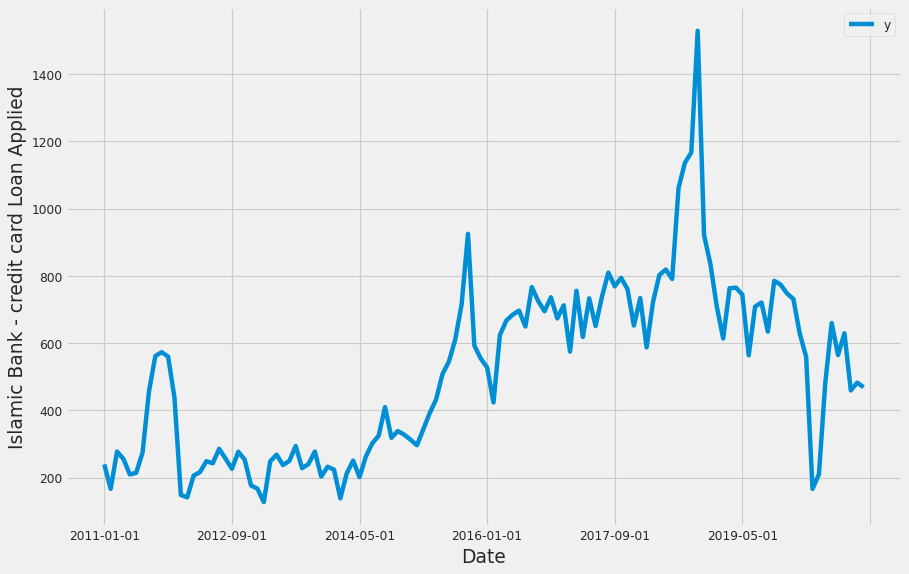

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Islamic Bank - credit card Loan Applied')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
151,2023-08-01
152,2023-09-01
153,2023-10-01
154,2023-11-01
155,2023-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2023-08-01,569.105347,269.311708,851.900991
152,2023-09-01,584.131074,293.614119,895.729853
153,2023-10-01,671.731099,357.865170,967.064555
154,2023-11-01,528.364814,231.746390,817.998287
155,2023-12-01,472.965642,156.890642,774.510717


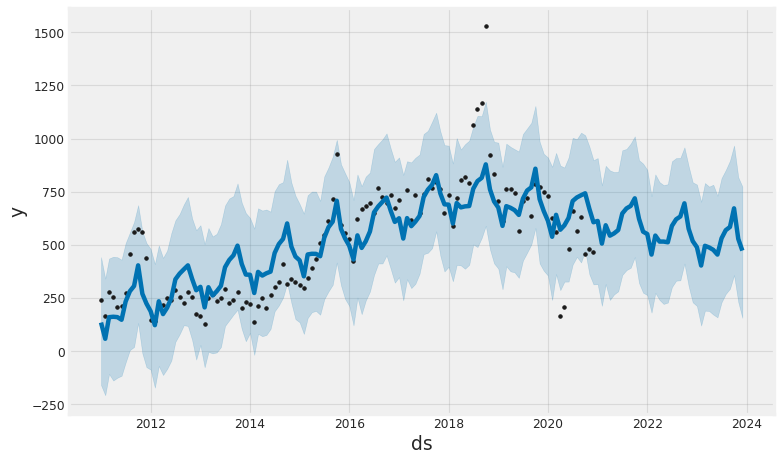

In [ ]:
my_model.plot(forecast,uncertainty=True);

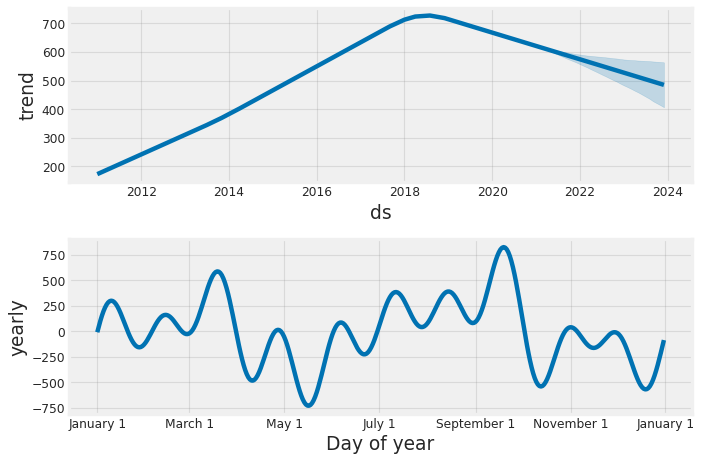

In [ ]:
my_model.plot_components(forecast);

In [ ]:
#!pip install pmdarima
#!pip install statsmodels 

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

from pandas import datetime
from pandas import DataFrame
plt.rcParams.update({'figure.figsize':(9,4), 'figure.dpi':80}) 


In [ ]:
df2 = pd.read_csv(url)
df2

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01,2706.397,2147.472,1574.988,238.925,0.116
1,2011-02-01,1992.288,1955.299,1455.753,166.503,0.034
2,2011-03-01,2313.784,3072.997,2180.135,277.362,0.040
3,2011-04-01,1883.896,3635.457,1716.299,255.266,0.237
4,2011-05-01,2232.802,4138.049,1843.763,209.453,0.232
...,...,...,...,...,...,...
115,2020-08-01,4776.557,11844.264,2554.465,564.418,0.000
116,2020-09-01,4960.012,13037.043,2987.149,629.092,5.515
117,2020-10-01,3867.833,12389.451,2658.326,459.273,4.230
118,2020-11-01,4707.025,12011.242,2676.911,482.274,0.000


In [ ]:
from datetime import datetime, date 

df2['date'] = pd.to_datetime(df2['date'], format = '%Y/%m/%d')
df2.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,vehicle,property,personal,credit card,consumer loan
0,2011-01-01 00:00:00,2706.397000,2147.472000,1574.988000,238.925000,0.116000
1,2011-02-01 00:00:00,1992.288000,1955.299000,1455.753000,166.503000,0.034000
2,2011-03-01 00:00:00,2313.784000,3072.997000,2180.135000,277.362000,0.040000
3,2011-04-01 00:00:00,1883.896000,3635.457000,1716.299000,255.266000,0.237000
4,2011-05-01 00:00:00,2232.802000,4138.049000,1843.763000,209.453000,0.232000


Text(0, 0.5, 'Loan Applied value')

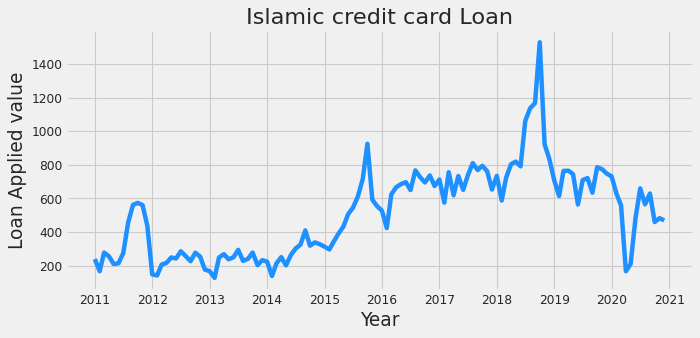

In [ ]:
# To compelte the data, as naive method, we will use ffill
sns.lineplot(x=df2['date'], y=df2['credit card'].fillna(method='ffill'), color='dodgerblue')

plt.title("Islamic credit card Loan")
plt.xlabel("Year")
plt.ylabel("Loan Applied value")

In [ ]:
df2 = df2.sort_values(by='date')

# Check time intervals
df2['delta'] = df2['date'] - df2['date'].shift(1)

df2[['date', 'delta']].head()

,date,delta
0,2011-01-01,NaT
1,2011-02-01,31 days
2,2011-03-01,28 days
3,2011-04-01,31 days
4,2011-05-01,30 days


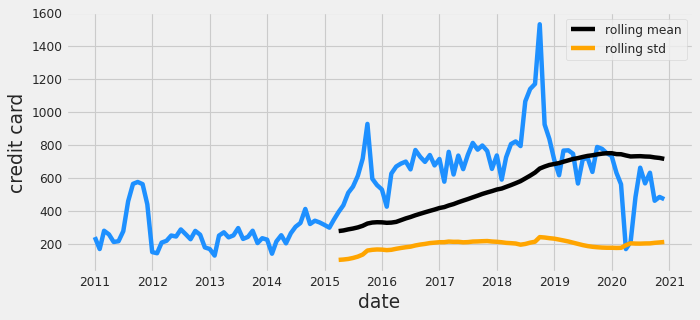

In [ ]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
#f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df2['date'], y=df2['credit card'], color='dodgerblue')
sns.lineplot(x=df2['date'], y=df2['credit card'].rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=df2['date'], y=df2['credit card'].rolling(rolling_window).std(), color='orange', label='rolling std')


## Stationarity Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
series = df2['credit card'].values
result = adfuller(series)
significance_level = 0.05
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

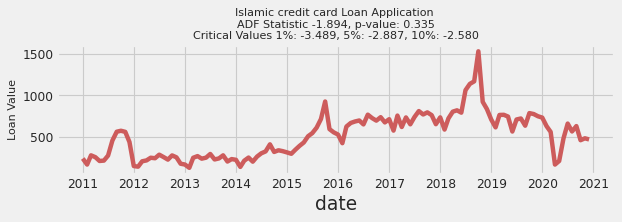

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df2.date, y=series, ax=ax, color=linecolor)
    ax.set_title(f'Islamic credit card Loan Application \nADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adfuller_results(df2['credit card'].values, 'Loan Value', ax)

#f.delaxes(ax[0])
plt.tight_layout()
plt.show()
#plt.title("Sales")
#plt.xlabel("Year")
#plt.ylabel("Sales Value")

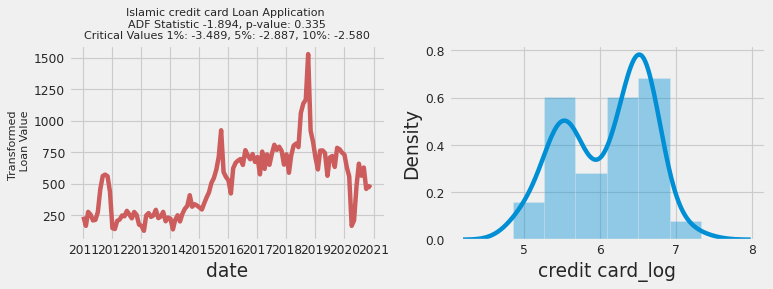

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df2['credit card_log'] = np.log(abs(df2['credit card']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
visualize_adfuller_results(df2['credit card'], 'Transformed \n Loan Value', ax[0])

sns.distplot(df2['credit card_log'], ax=ax[1])

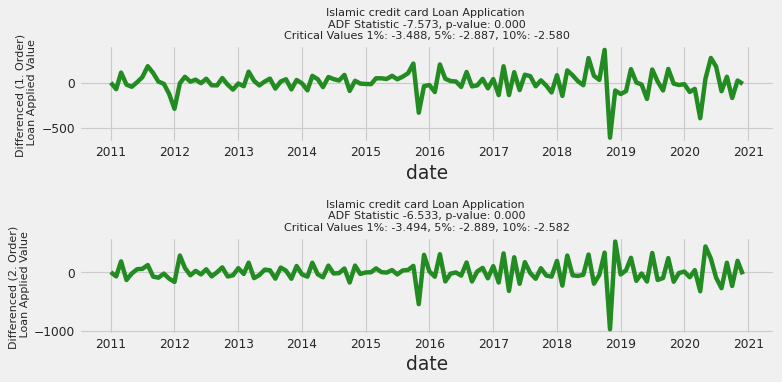

In [ ]:
# First Order Differencing
ts_diff = np.diff(df2['credit card'])
df2['credit card_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df2['credit card_diff_1'])
df2['credit card_diff_2'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

visualize_adfuller_results(df2['credit card_diff_1'], 'Differenced (1. Order) \n Loan Applied Value', ax[0])
visualize_adfuller_results(df2['credit card_diff_2'], 'Differenced (2. Order) \n Loan Applied Value', ax[1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['credit card']

for column in core_columns:
    decomp = seasonal_decompose(df2[column], freq=52, model='additive', extrapolate_trend='freq')
    df2[f"{column}_trend"] = decomp.trend
    df2[f"{column}_seasonal"] = decomp.seasonal

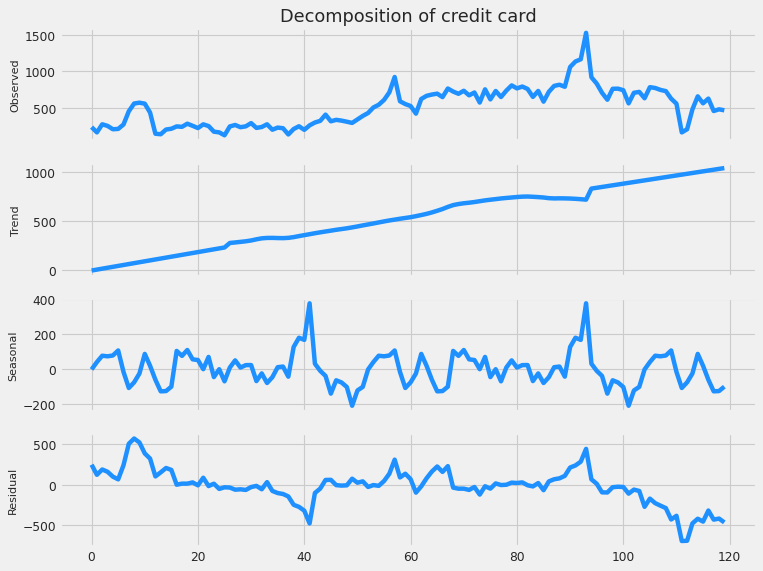

In [ ]:
core_columns =  ['credit card']

fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
res = seasonal_decompose(df2[column], freq=52, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=10)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=10)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=10)
    
res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=10)

plt.show()

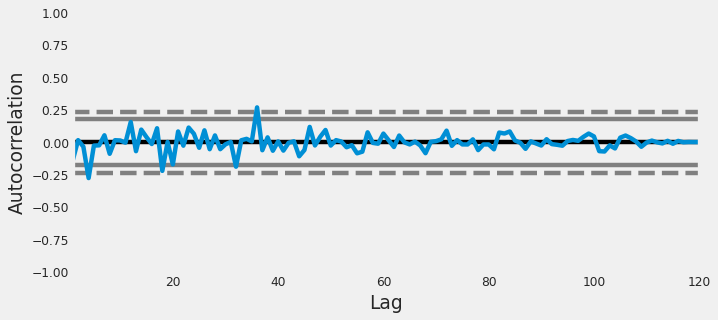

In [ ]:
autocorrelation_plot(df2['credit card_diff_1'])
plt.show()

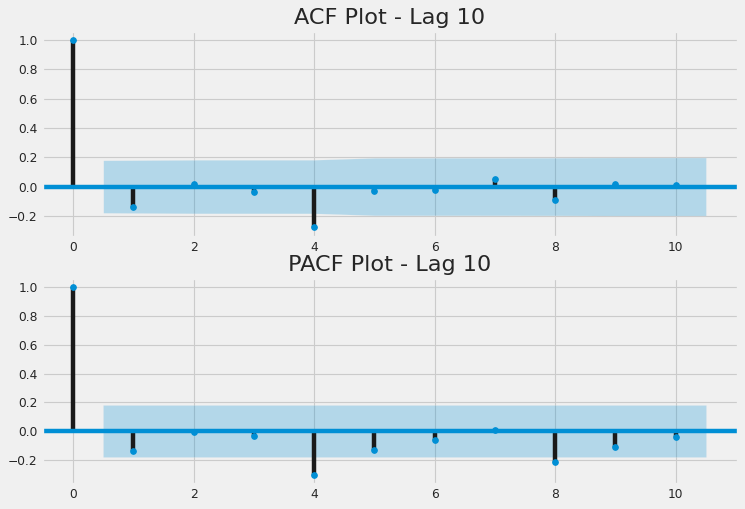

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

plot_acf(df2['credit card_diff_1'], lags=10, ax=ax[0], title='ACF Plot - Lag 10')
plot_pacf(df2['credit card_diff_1'], lags=10, ax=ax[1], title='PACF Plot - Lag 10')

plt.show()

In [ ]:
train_size = int(0.80 * len(df))
test_size = len(df) - train_size

univariate_df = df2[['date', 'credit card']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(y_valid), len(x_valid))

24 24


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet

# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 558.0295443802136


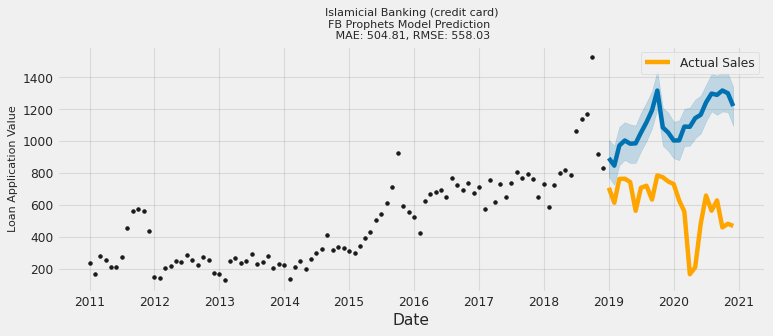

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Actual Sales') #navajowhite

ax.set_title(f"Islamicial Banking (credit card)\nFB Prophets Model Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}", fontsize=10)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Loan Application Value', fontsize=10)

plt.show()

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(24)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 455.375977052975


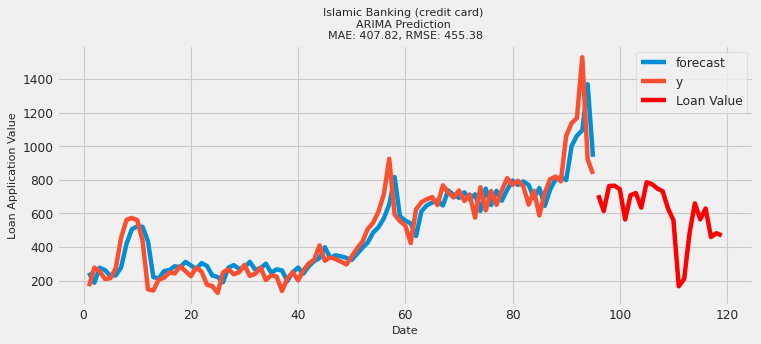

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(10)

model_fit.plot_predict(1, 95, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='red', label='Loan Value')

ax.set_title(f'Islamic Banking (credit card) \nARIMA Prediction \nMAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=10)
ax.set_xlabel(xlabel='Date', fontsize=10)
ax.set_ylabel(ylabel='Loan Application Value', fontsize=10)

plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(series, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

     |████████████████████████████████| 1.5MB 32.9MB/s 
     |████████████████████████████████| 9.5MB 15.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


ImportError: ignored